In [ ]:
#this program detects if the person have dibetes or not

In [109]:
#load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [110]:
#Load the data
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [111]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [112]:
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [113]:
df.shape

(768, 9)

In [114]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [115]:
corr_matrix = df.corr()

corr_matrix["Age"].sort_values(ascending=False)

Age                         1.000000
Pregnancies                 0.544341
Glucose                     0.263514
BloodPressure               0.239528
Outcome                     0.238356
BMI                         0.036242
DiabetesPedigreeFunction    0.033561
Insulin                    -0.042163
SkinThickness              -0.113970
Name: Age, dtype: float64

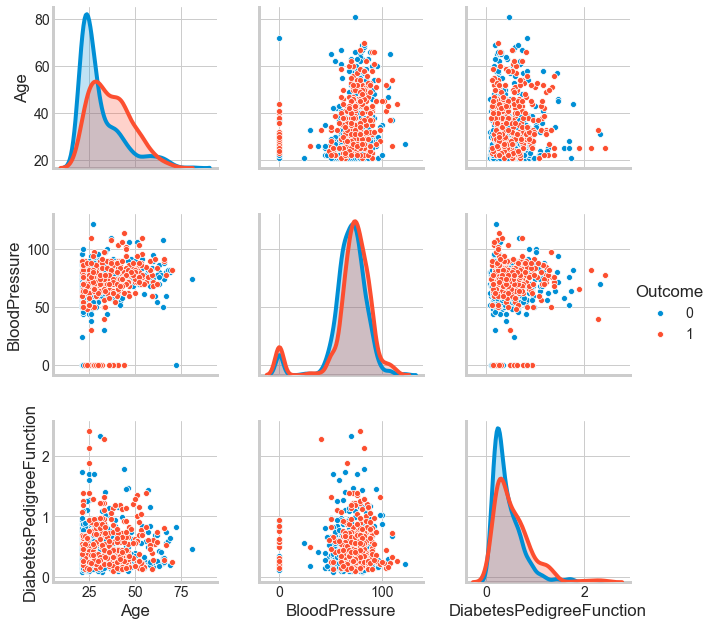

In [116]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Outcome",vars = ['Age', 'BloodPressure', 'DiabetesPedigreeFunction'], height=3);
plt.show()

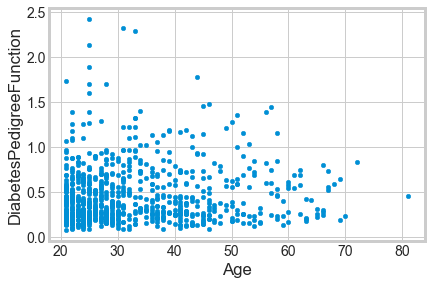

In [117]:
df.plot(kind="scatter", x='Age', y='DiabetesPedigreeFunction')

In [118]:
#check for the dupicate and remove them
df.drop_duplicates(inplace=True)

In [119]:
df.shape

(768, 9)

In [120]:
#show the number of missing data for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [144]:
corr_matrix = df.corr()

corr_matrix["Age"].sort_values(ascending=False)

Age                         1.000000
Pregnancies                 0.544341
Glucose                     0.263514
BloodPressure               0.239528
Outcome                     0.238356
BMI                         0.036242
DiabetesPedigreeFunction    0.033561
Insulin                    -0.042163
SkinThickness              -0.113970
Name: Age, dtype: float64

In [147]:
df = df.drop(['SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI'], axis=1)

In [148]:
df.head()

,Pregnancies,Glucose,BloodPressure,Age,Outcome
0,6,148,72,50,1
1,1,85,66,31,0
2,8,183,64,32,1
3,1,89,66,21,0
4,0,137,40,33,1


In [149]:
#convert the data into array
dataset = df.values
dataset

array([[  6, 148,  72,  50,   1],
       [  1,  85,  66,  31,   0],
       [  8, 183,  64,  32,   1],
       ...,
       [  5, 121,  72,  30,   0],
       [  1, 126,  60,  47,   1],
       [  1,  93,  70,  23,   0]], dtype=int64)

In [154]:
#Get all of the rows of the first eight columns of the data set
X = dataset[:, 0:5]
y = dataset[:, 4]

X

array([[  6, 148,  72,  50,   1],
       [  1,  85,  66,  31,   0],
       [  8, 183,  64,  32,   1],
       ...,
       [  5, 121,  72,  30,   0],
       [  1, 126,  60,  47,   1],
       [  1,  93,  70,  23,   0]], dtype=int64)

In [155]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [157]:
#process the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, 0.48333333, 1.        ],
       [0.05882353, 0.42713568, 0.54098361, 0.16666667, 0.        ],
       [0.47058824, 0.91959799, 0.52459016, 0.18333333, 1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, 0.15      , 0.        ],
       [0.05882353, 0.63316583, 0.49180328, 0.43333333, 1.        ],
       [0.05882353, 0.46733668, 0.57377049, 0.03333333, 0.        ]])

In [158]:
#split the data 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

In [162]:
#Build the model
model = Sequential([
    Dense(12, activation='relu', input_shape=(5,)),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [163]:
#Compile the model
model.compile(
 optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [165]:
#train the model
hist = model.fit(X_train, y_train, batch_size = 57, epochs=1000, validation_split=0.2)

Train on 491 samples, validate on 123 samples
Epoch 1/1000
491/491 [==============================] - 0s 49us/step - loss: 8.6685e-04 - accuracy: 1.0000 - val_loss: 9.0211e-04 - val_accuracy: 1.0000
Epoch 2/1000
491/491 [==============================] - 0s 57us/step - loss: 8.6568e-04 - accuracy: 1.0000 - val_loss: 9.0090e-04 - val_accuracy: 1.0000
Epoch 3/1000
491/491 [==============================] - 0s 73us/step - loss: 8.6453e-04 - accuracy: 1.0000 - val_loss: 8.9968e-04 - val_accuracy: 1.0000
Epoch 4/1000
491/491 [==============================] - 0s 49us/step - loss: 8.6337e-04 - accuracy: 1.0000 - val_loss: 8.9848e-04 - val_accuracy: 1.0000
Epoch 5/1000
491/491 [==============================] - 0s 49us/step - loss: 8.6222e-04 - accuracy: 1.0000 - val_loss: 8.9728e-04 - val_accuracy: 1.0000
Epoch 6/1000
491/491 [==============================] - 0s 49us/step - loss: 8.6107e-04 - accuracy: 1.0000 - val_loss: 8.9608e-04 - val_accuracy: 1.0000
Epoch 7/1000
491/491 [==============

Epoch 54/1000
491/491 [==============================] - 0s 49us/step - loss: 8.0876e-04 - accuracy: 1.0000 - val_loss: 8.4152e-04 - val_accuracy: 1.0000
Epoch 55/1000
491/491 [==============================] - 0s 65us/step - loss: 8.0774e-04 - accuracy: 1.0000 - val_loss: 8.4045e-04 - val_accuracy: 1.0000
Epoch 56/1000
491/491 [==============================] - 0s 57us/step - loss: 8.0672e-04 - accuracy: 1.0000 - val_loss: 8.3938e-04 - val_accuracy: 1.0000
Epoch 57/1000
491/491 [==============================] - 0s 49us/step - loss: 8.0570e-04 - accuracy: 1.0000 - val_loss: 8.3832e-04 - val_accuracy: 1.0000
Epoch 58/1000
491/491 [==============================] - 0s 57us/step - loss: 8.0468e-04 - accuracy: 1.0000 - val_loss: 8.3726e-04 - val_accuracy: 1.0000
Epoch 59/1000
491/491 [==============================] - 0s 49us/step - loss: 8.0367e-04 - accuracy: 1.0000 - val_loss: 8.3621e-04 - val_accuracy: 1.0000
Epoch 60/1000
491/491 [==============================] - 0s 49us/step - loss

Epoch 160/1000
491/491 [==============================] - 0s 41us/step - loss: 7.1159e-04 - accuracy: 1.0000 - val_loss: 7.4008e-04 - val_accuracy: 1.0000
Epoch 161/1000
491/491 [==============================] - 0s 49us/step - loss: 7.1078e-04 - accuracy: 1.0000 - val_loss: 7.3923e-04 - val_accuracy: 1.0000
Epoch 162/1000
491/491 [==============================] - 0s 41us/step - loss: 7.0996e-04 - accuracy: 1.0000 - val_loss: 7.3839e-04 - val_accuracy: 1.0000
Epoch 163/1000
491/491 [==============================] - 0s 49us/step - loss: 7.0916e-04 - accuracy: 1.0000 - val_loss: 7.3754e-04 - val_accuracy: 1.0000
Epoch 164/1000
491/491 [==============================] - 0s 41us/step - loss: 7.0835e-04 - accuracy: 1.0000 - val_loss: 7.3669e-04 - val_accuracy: 1.0000
Epoch 165/1000
491/491 [==============================] - 0s 57us/step - loss: 7.0755e-04 - accuracy: 1.0000 - val_loss: 7.3585e-04 - val_accuracy: 1.0000
Epoch 166/1000
491/491 [==============================] - 0s 49us/step

491/491 [==============================] - 0s 49us/step - loss: 6.3518e-04 - accuracy: 1.0000 - val_loss: 6.6037e-04 - val_accuracy: 1.0000
Epoch 265/1000
491/491 [==============================] - 0s 49us/step - loss: 6.3452e-04 - accuracy: 1.0000 - val_loss: 6.5968e-04 - val_accuracy: 1.0000
Epoch 266/1000
491/491 [==============================] - 0s 49us/step - loss: 6.3386e-04 - accuracy: 1.0000 - val_loss: 6.5899e-04 - val_accuracy: 1.0000
Epoch 267/1000
491/491 [==============================] - 0s 49us/step - loss: 6.3320e-04 - accuracy: 1.0000 - val_loss: 6.5831e-04 - val_accuracy: 1.0000
Epoch 268/1000
491/491 [==============================] - 0s 41us/step - loss: 6.3255e-04 - accuracy: 1.0000 - val_loss: 6.5761e-04 - val_accuracy: 1.0000
Epoch 269/1000
491/491 [==============================] - 0s 49us/step - loss: 6.3188e-04 - accuracy: 1.0000 - val_loss: 6.5692e-04 - val_accuracy: 1.0000
Epoch 270/1000
491/491 [==============================] - 0s 41us/step - loss: 6.3123

Epoch 369/1000
491/491 [==============================] - 0s 73us/step - loss: 5.7183e-04 - accuracy: 1.0000 - val_loss: 5.9427e-04 - val_accuracy: 1.0000
Epoch 370/1000
491/491 [==============================] - 0s 65us/step - loss: 5.7128e-04 - accuracy: 1.0000 - val_loss: 5.9370e-04 - val_accuracy: 1.0000
Epoch 371/1000
491/491 [==============================] - 0s 49us/step - loss: 5.7073e-04 - accuracy: 1.0000 - val_loss: 5.9314e-04 - val_accuracy: 1.0000
Epoch 372/1000
491/491 [==============================] - 0s 57us/step - loss: 5.7020e-04 - accuracy: 1.0000 - val_loss: 5.9257e-04 - val_accuracy: 1.0000
Epoch 373/1000
491/491 [==============================] - 0s 57us/step - loss: 5.6965e-04 - accuracy: 1.0000 - val_loss: 5.9200e-04 - val_accuracy: 1.0000
Epoch 374/1000
491/491 [==============================] - 0s 65us/step - loss: 5.6911e-04 - accuracy: 1.0000 - val_loss: 5.9144e-04 - val_accuracy: 1.0000
Epoch 375/1000
491/491 [==============================] - 0s 49us/step

Epoch 474/1000
491/491 [==============================] - 0s 57us/step - loss: 5.1920e-04 - accuracy: 1.0000 - val_loss: 5.3940e-04 - val_accuracy: 1.0000
Epoch 475/1000
491/491 [==============================] - 0s 65us/step - loss: 5.1874e-04 - accuracy: 1.0000 - val_loss: 5.3892e-04 - val_accuracy: 1.0000
Epoch 476/1000
491/491 [==============================] - 0s 57us/step - loss: 5.1828e-04 - accuracy: 1.0000 - val_loss: 5.3844e-04 - val_accuracy: 1.0000
Epoch 477/1000
491/491 [==============================] - 0s 57us/step - loss: 5.1783e-04 - accuracy: 1.0000 - val_loss: 5.3796e-04 - val_accuracy: 1.0000
Epoch 478/1000
491/491 [==============================] - 0s 57us/step - loss: 5.1737e-04 - accuracy: 1.0000 - val_loss: 5.3749e-04 - val_accuracy: 1.0000
Epoch 479/1000
491/491 [==============================] - 0s 57us/step - loss: 5.1692e-04 - accuracy: 1.0000 - val_loss: 5.3701e-04 - val_accuracy: 1.0000
Epoch 480/1000
491/491 [==============================] - 0s 41us/step

Epoch 579/1000
491/491 [==============================] - 0s 49us/step - loss: 4.7477e-04 - accuracy: 1.0000 - val_loss: 4.9304e-04 - val_accuracy: 1.0000
Epoch 580/1000
491/491 [==============================] - 0s 49us/step - loss: 4.7437e-04 - accuracy: 1.0000 - val_loss: 4.9263e-04 - val_accuracy: 1.0000
Epoch 581/1000
491/491 [==============================] - 0s 49us/step - loss: 4.7398e-04 - accuracy: 1.0000 - val_loss: 4.9222e-04 - val_accuracy: 1.0000
Epoch 582/1000
491/491 [==============================] - 0s 57us/step - loss: 4.7359e-04 - accuracy: 1.0000 - val_loss: 4.9182e-04 - val_accuracy: 1.0000
Epoch 583/1000
491/491 [==============================] - 0s 65us/step - loss: 4.7320e-04 - accuracy: 1.0000 - val_loss: 4.9141e-04 - val_accuracy: 1.0000
Epoch 584/1000
491/491 [==============================] - 0s 41us/step - loss: 4.7281e-04 - accuracy: 1.0000 - val_loss: 4.9101e-04 - val_accuracy: 1.0000
Epoch 585/1000
491/491 [==============================] - 0s 49us/step

Epoch 632/1000
491/491 [==============================] - 0s 57us/step - loss: 4.5490e-04 - accuracy: 1.0000 - val_loss: 4.7234e-04 - val_accuracy: 1.0000
Epoch 633/1000
491/491 [==============================] - 0s 57us/step - loss: 4.5453e-04 - accuracy: 1.0000 - val_loss: 4.7197e-04 - val_accuracy: 1.0000
Epoch 634/1000
491/491 [==============================] - 0s 57us/step - loss: 4.5418e-04 - accuracy: 1.0000 - val_loss: 4.7159e-04 - val_accuracy: 1.0000
Epoch 635/1000
491/491 [==============================] - 0s 57us/step - loss: 4.5382e-04 - accuracy: 1.0000 - val_loss: 4.7122e-04 - val_accuracy: 1.0000
Epoch 636/1000
491/491 [==============================] - 0s 57us/step - loss: 4.5346e-04 - accuracy: 1.0000 - val_loss: 4.7085e-04 - val_accuracy: 1.0000
Epoch 637/1000
491/491 [==============================] - 0s 49us/step - loss: 4.5311e-04 - accuracy: 1.0000 - val_loss: 4.7046e-04 - val_accuracy: 1.0000
Epoch 638/1000
491/491 [==============================] - 0s 49us/step

Epoch 685/1000
491/491 [==============================] - 0s 49us/step - loss: 4.3649e-04 - accuracy: 1.0000 - val_loss: 4.5315e-04 - val_accuracy: 1.0000
Epoch 686/1000
491/491 [==============================] - 0s 57us/step - loss: 4.3616e-04 - accuracy: 1.0000 - val_loss: 4.5280e-04 - val_accuracy: 1.0000
Epoch 687/1000
491/491 [==============================] - 0s 49us/step - loss: 4.3583e-04 - accuracy: 1.0000 - val_loss: 4.5246e-04 - val_accuracy: 1.0000
Epoch 688/1000
491/491 [==============================] - 0s 41us/step - loss: 4.3549e-04 - accuracy: 1.0000 - val_loss: 4.5210e-04 - val_accuracy: 1.0000
Epoch 689/1000
491/491 [==============================] - 0s 49us/step - loss: 4.3516e-04 - accuracy: 1.0000 - val_loss: 4.5175e-04 - val_accuracy: 1.0000
Epoch 690/1000
491/491 [==============================] - 0s 57us/step - loss: 4.3483e-04 - accuracy: 1.0000 - val_loss: 4.5141e-04 - val_accuracy: 1.0000
Epoch 691/1000
491/491 [==============================] - 0s 73us/step

Epoch 738/1000
491/491 [==============================] - 0s 49us/step - loss: 4.1940e-04 - accuracy: 1.0000 - val_loss: 4.3533e-04 - val_accuracy: 1.0000
Epoch 739/1000
491/491 [==============================] - 0s 49us/step - loss: 4.1909e-04 - accuracy: 1.0000 - val_loss: 4.3501e-04 - val_accuracy: 1.0000
Epoch 740/1000
491/491 [==============================] - 0s 41us/step - loss: 4.1878e-04 - accuracy: 1.0000 - val_loss: 4.3469e-04 - val_accuracy: 1.0000
Epoch 741/1000
491/491 [==============================] - 0s 57us/step - loss: 4.1847e-04 - accuracy: 1.0000 - val_loss: 4.3437e-04 - val_accuracy: 1.0000
Epoch 742/1000
491/491 [==============================] - 0s 41us/step - loss: 4.1817e-04 - accuracy: 1.0000 - val_loss: 4.3405e-04 - val_accuracy: 1.0000
Epoch 743/1000
491/491 [==============================] - 0s 49us/step - loss: 4.1786e-04 - accuracy: 1.0000 - val_loss: 4.3373e-04 - val_accuracy: 1.0000
Epoch 744/1000
491/491 [==============================] - 0s 41us/step

Epoch 791/1000
491/491 [==============================] - 0s 57us/step - loss: 4.0351e-04 - accuracy: 1.0000 - val_loss: 4.1877e-04 - val_accuracy: 1.0000
Epoch 792/1000
491/491 [==============================] - 0s 41us/step - loss: 4.0323e-04 - accuracy: 1.0000 - val_loss: 4.1846e-04 - val_accuracy: 1.0000
Epoch 793/1000
491/491 [==============================] - 0s 41us/step - loss: 4.0293e-04 - accuracy: 1.0000 - val_loss: 4.1816e-04 - val_accuracy: 1.0000
Epoch 794/1000
491/491 [==============================] - 0s 49us/step - loss: 4.0264e-04 - accuracy: 1.0000 - val_loss: 4.1786e-04 - val_accuracy: 1.0000
Epoch 795/1000
491/491 [==============================] - 0s 41us/step - loss: 4.0236e-04 - accuracy: 1.0000 - val_loss: 4.1756e-04 - val_accuracy: 1.0000
Epoch 796/1000
491/491 [==============================] - 0s 41us/step - loss: 4.0207e-04 - accuracy: 1.0000 - val_loss: 4.1726e-04 - val_accuracy: 1.0000
Epoch 797/1000
491/491 [==============================] - 0s 49us/step

Epoch 844/1000
491/491 [==============================] - 0s 49us/step - loss: 3.8867e-04 - accuracy: 1.0000 - val_loss: 4.0330e-04 - val_accuracy: 1.0000
Epoch 845/1000
491/491 [==============================] - 0s 49us/step - loss: 3.8840e-04 - accuracy: 1.0000 - val_loss: 4.0302e-04 - val_accuracy: 1.0000
Epoch 846/1000
491/491 [==============================] - 0s 49us/step - loss: 3.8814e-04 - accuracy: 1.0000 - val_loss: 4.0273e-04 - val_accuracy: 1.0000
Epoch 847/1000
491/491 [==============================] - 0s 49us/step - loss: 3.8786e-04 - accuracy: 1.0000 - val_loss: 4.0245e-04 - val_accuracy: 1.0000
Epoch 848/1000
491/491 [==============================] - 0s 41us/step - loss: 3.8760e-04 - accuracy: 1.0000 - val_loss: 4.0218e-04 - val_accuracy: 1.0000
Epoch 849/1000
491/491 [==============================] - 0s 65us/step - loss: 3.8733e-04 - accuracy: 1.0000 - val_loss: 4.0190e-04 - val_accuracy: 1.0000
Epoch 850/1000
491/491 [==============================] - 0s 65us/step

Epoch 897/1000
491/491 [==============================] - 0s 49us/step - loss: 3.7481e-04 - accuracy: 1.0000 - val_loss: 3.8885e-04 - val_accuracy: 1.0000
Epoch 898/1000
491/491 [==============================] - 0s 49us/step - loss: 3.7456e-04 - accuracy: 1.0000 - val_loss: 3.8858e-04 - val_accuracy: 1.0000
Epoch 899/1000
491/491 [==============================] - 0s 57us/step - loss: 3.7431e-04 - accuracy: 1.0000 - val_loss: 3.8832e-04 - val_accuracy: 1.0000
Epoch 900/1000
491/491 [==============================] - 0s 49us/step - loss: 3.7406e-04 - accuracy: 1.0000 - val_loss: 3.8806e-04 - val_accuracy: 1.0000
Epoch 901/1000
491/491 [==============================] - 0s 33us/step - loss: 3.7381e-04 - accuracy: 1.0000 - val_loss: 3.8780e-04 - val_accuracy: 1.0000
Epoch 902/1000
491/491 [==============================] - 0s 57us/step - loss: 3.7356e-04 - accuracy: 1.0000 - val_loss: 3.8754e-04 - val_accuracy: 1.0000
Epoch 903/1000
491/491 [==============================] - 0s 41us/step

Epoch 950/1000
491/491 [==============================] - 0s 41us/step - loss: 3.6185e-04 - accuracy: 1.0000 - val_loss: 3.7534e-04 - val_accuracy: 1.0000
Epoch 951/1000
491/491 [==============================] - 0s 57us/step - loss: 3.6161e-04 - accuracy: 1.0000 - val_loss: 3.7509e-04 - val_accuracy: 1.0000
Epoch 952/1000
491/491 [==============================] - 0s 57us/step - loss: 3.6137e-04 - accuracy: 1.0000 - val_loss: 3.7484e-04 - val_accuracy: 1.0000
Epoch 953/1000
491/491 [==============================] - 0s 57us/step - loss: 3.6114e-04 - accuracy: 1.0000 - val_loss: 3.7459e-04 - val_accuracy: 1.0000
Epoch 954/1000
491/491 [==============================] - 0s 57us/step - loss: 3.6090e-04 - accuracy: 1.0000 - val_loss: 3.7434e-04 - val_accuracy: 1.0000
Epoch 955/1000
491/491 [==============================] - 0s 57us/step - loss: 3.6066e-04 - accuracy: 1.0000 - val_loss: 3.7409e-04 - val_accuracy: 1.0000
Epoch 956/1000
491/491 [==============================] - 0s 65us/step

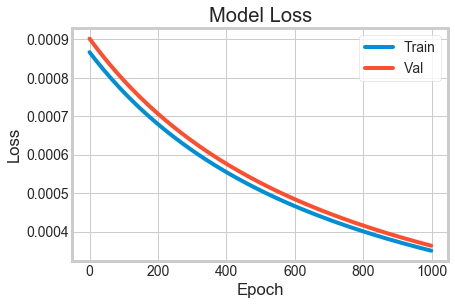

In [166]:
#visualise th training loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

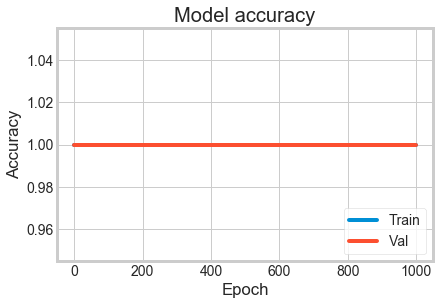

In [168]:
#visualise th training Accuracy and the validation to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [169]:
#make a prediction & print the actual values
prediction = model.predict(X_test)
prediction = [1 if y >= 0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 1]


In [170]:
#evalute the model on the trainig data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_train)
pred = [1 if y >= 0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy:', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       216

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Confusion Matrix: 
 [[398   0]
 [  0 216]]

Accuracy: 1.0


In [171]:
#evalute the model on the test data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_test)
pred = [1 if y >= 0.5 else 0 for y in pred]
print(classification_report(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy:', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        52

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Confusion Matrix: 
 [[102   0]
 [  0  52]]

Accuracy: 1.0
